导入pygmt库

In [1]:
import pygmt

设置绘图区域，以东北亚地区为例。  
从全球地形起伏数据earth——relief 以60分到1秒的分辨率加载数据。  
分辨率resolution，全球地形先用30m、全国地形起伏用05m、3度X3度用30s、更小的区域用03s。

In [7]:
region = [110, 155, 30, 55]
grid = pygmt.datasets.load_earth_relief(resolution="03m", region=region)

创建图片，设置基本参数。

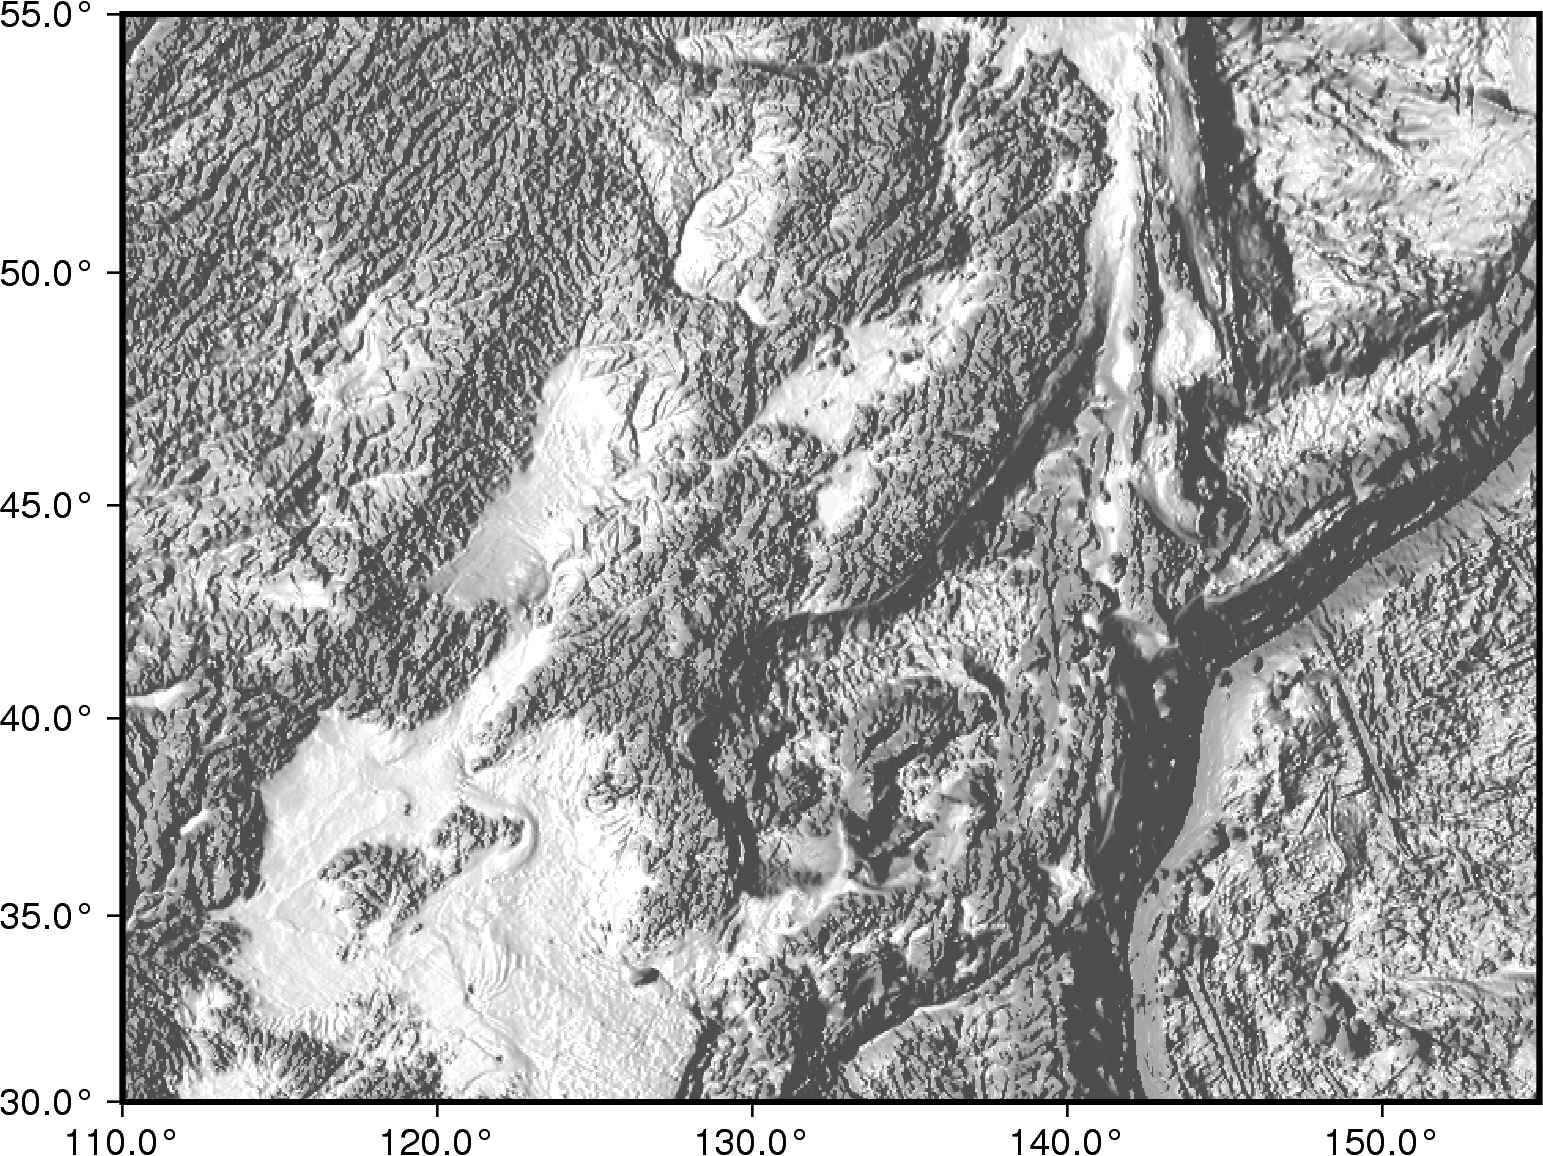

In [68]:
# 创建Figure对象
fig = pygmt.Figure()
# 计算地形阴影效果：设置光源从正西方向（方位角270度），仰角30度
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])
# 配置全局地图参数：坐标格式为十进制度，隐藏默认边框
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")
# 创建新的灰度色标（适用于阴影强度值范围）
pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# 绘制山体阴影图
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=[ "xa", "ya"],
    cmap=True,
)
fig.show()

将海洋用浅蓝色填充

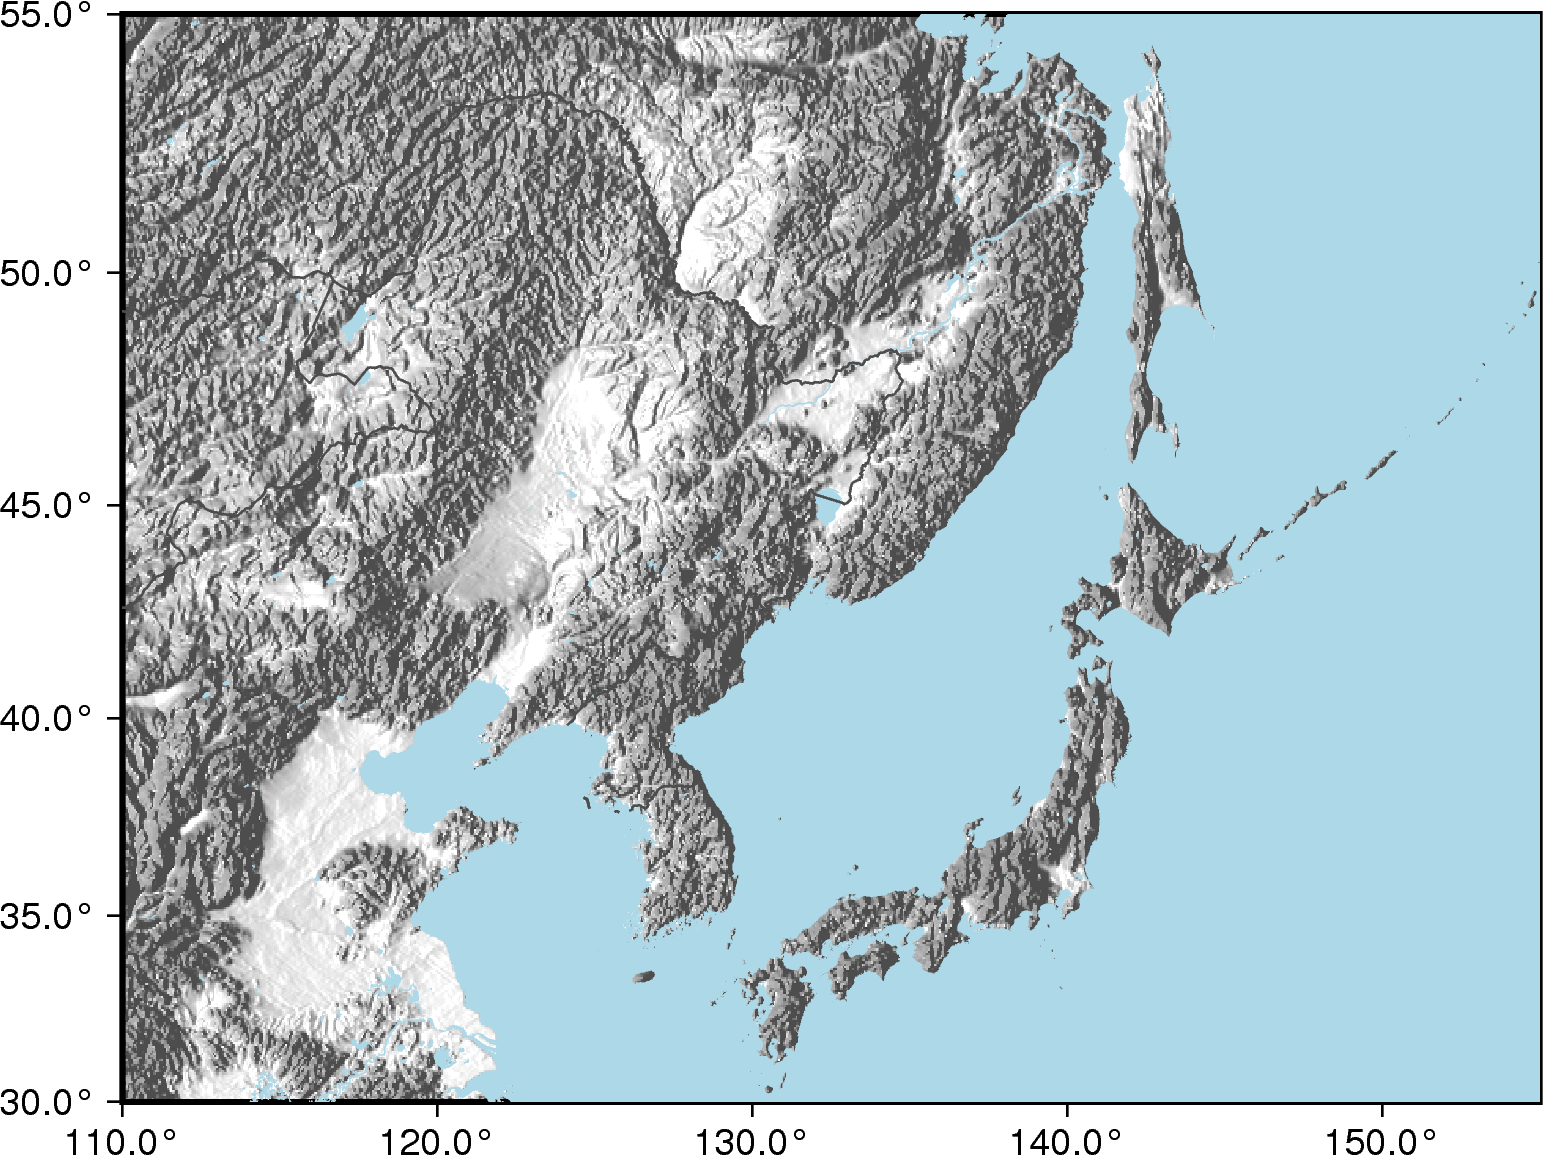

In [69]:
fig.coast(
    water="lightblue@80",  # 浅蓝色海域填充（覆盖原有白色）
    borders=["1/0.5p,gray30"],  # 简化边界颜色
)
fig.show()

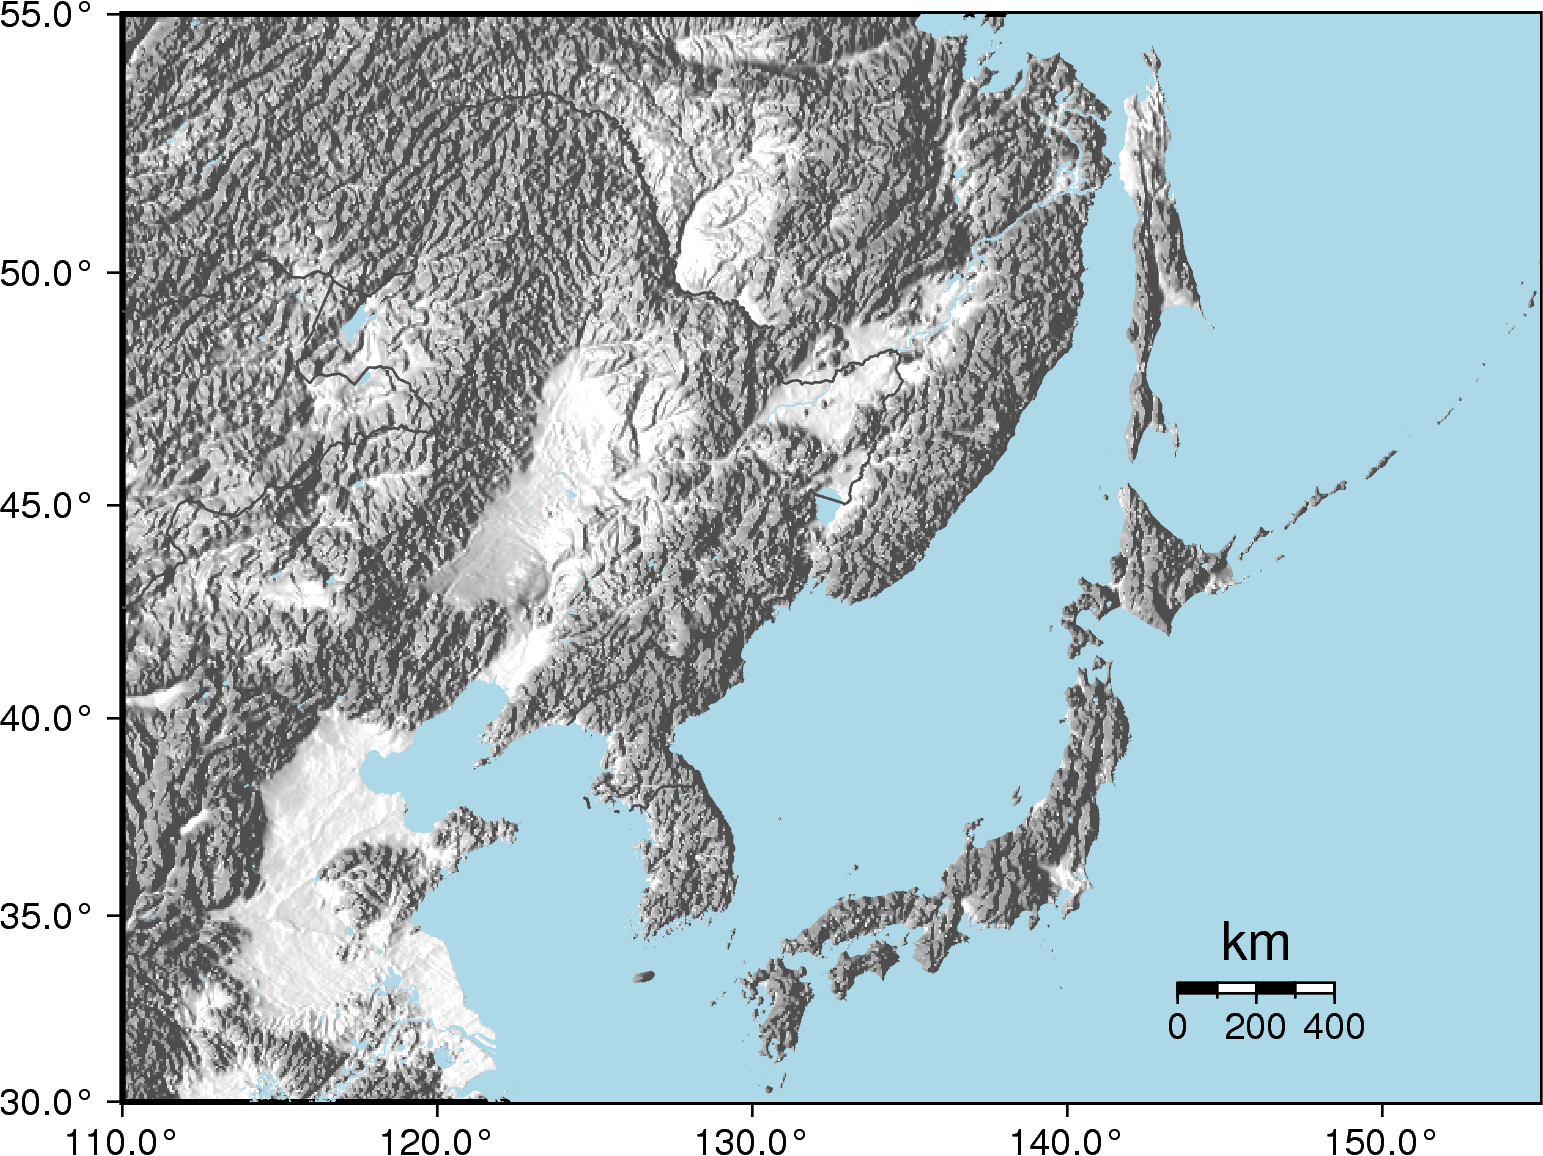

In [70]:
# 在地图下方添加比例尺
# n0.8/0.1:比例尺的位置
# w400k：比例尺长400km
# f：添加比例尺标签
# l:添加单位
fig.basemap(map_scale="n0.8/0.1+c+w400k+f+l")

# 显示图像
fig.show()

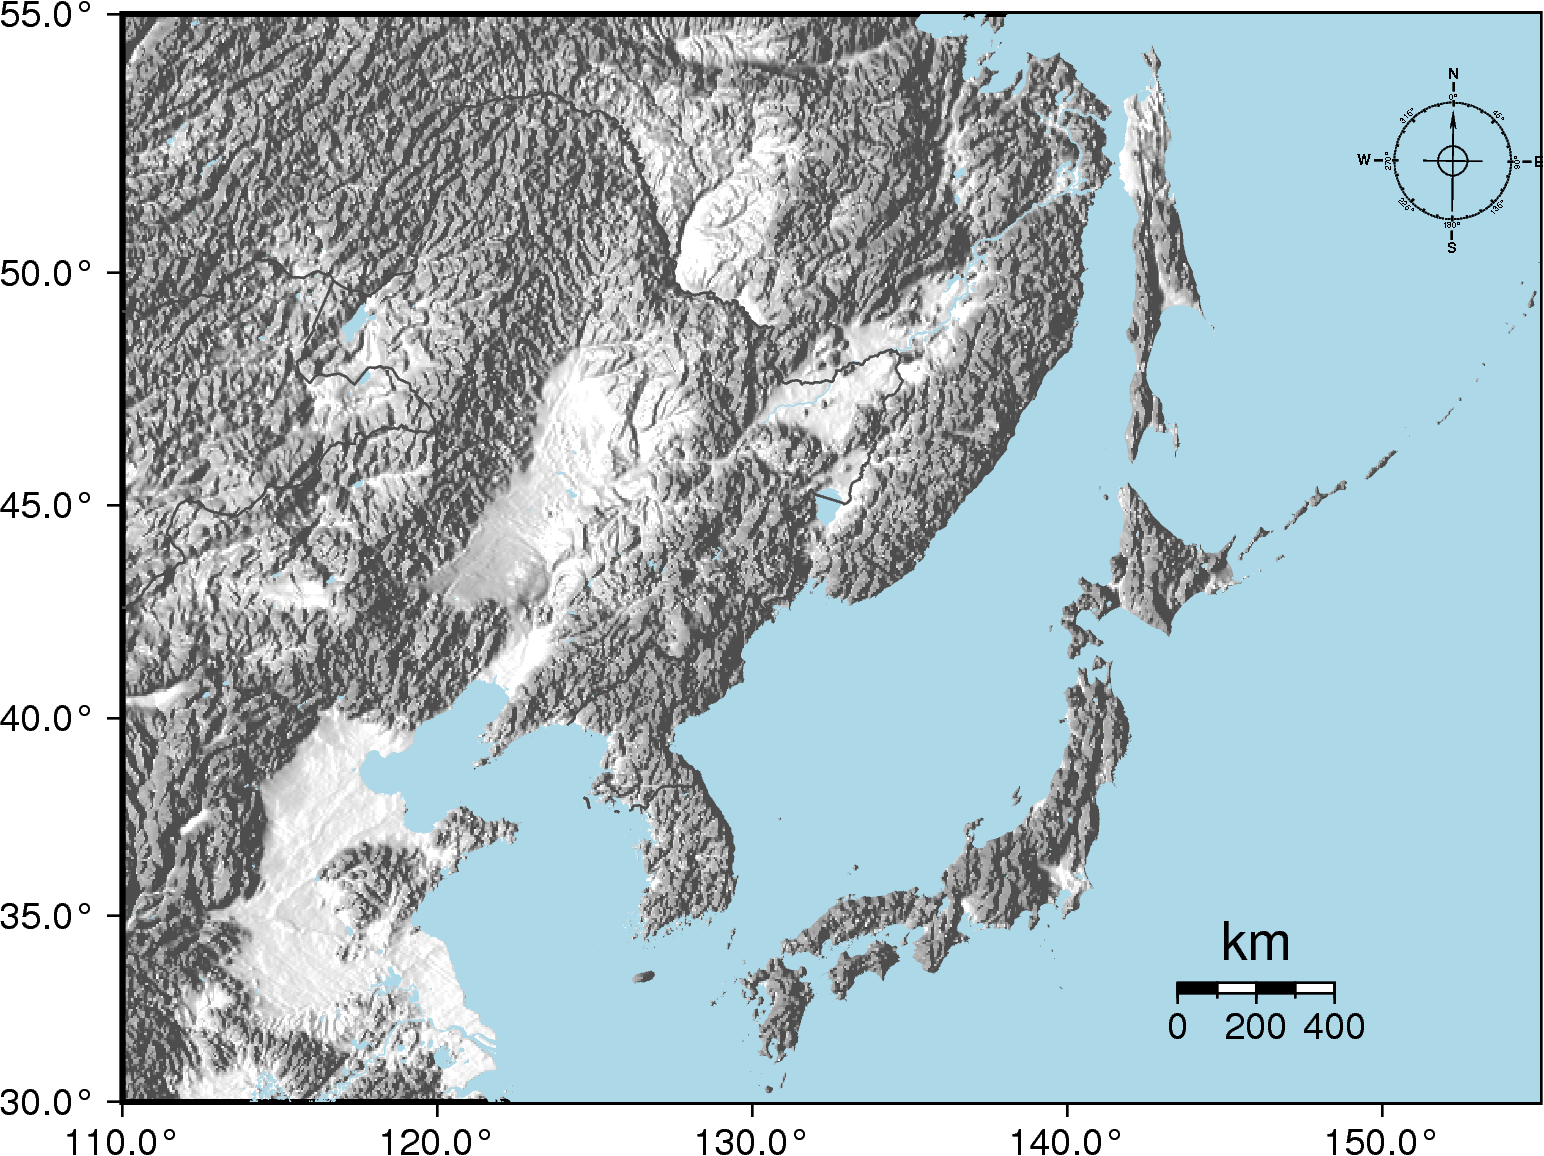

In [71]:
# 添加指北针（显示N、E、S、W）
# jTR:j=对齐方式，T顶部，R右侧
# w1c指南针宽1cm
# o0c/0.5c 水平方向不偏移，向下移动0.5cm
# 标签是WESN
fig.basemap(compass="jTR+w1c+o0c/0.5c+lW,E,S,N")
fig.show()